## SPARKS GRIP Data Science/Business Analytics
### Task 1: Linear Regression

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

In [12]:
# Import data from https
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The first step in our data analysis is to plot the distribution of hours spent studying vs end scores. Using matplotlib, we can plot this using the former as the 'X' values and the latter as the 'Y'.

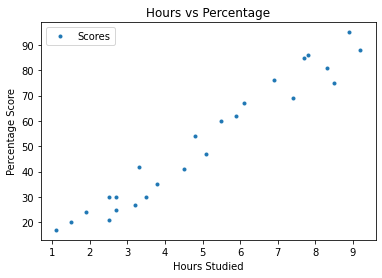

From this graph we can see a positive linear correlation between the number of hours studied and the score percentage of that individual


In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
print('From this graph we can see a positive linear correlation between the number of hours studied and the score percentage of that individual')

## Create Training and Testing sets
The next step is to split this data into training, testing, and validation sets. This will be done with Scikit-Learn's train_test_split() method.

In [28]:
X = data.iloc[:, :-1].values # Generate measured Attributes (hours studied)
y = data.iloc[:, 1].values # Create Labels from percentage score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [29]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Regression model trained")

Regression model trained


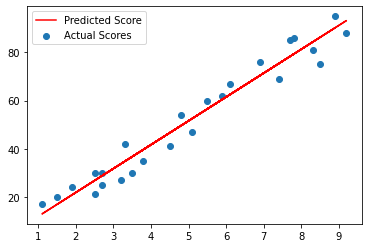

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.legend(['Predicted Score', 'Actual Scores'])
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, we will use use the 'test' values of our dataset to predict their score using this line of best fit


In [39]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


These are our testing values for hours that we will plug into our prediction model

In [55]:
# Comparing Actual Scores to Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


This dataframe reflects both our actual scores and the model's predictions using the same numbers of Hours

In [49]:
# You can also test with your own data
hours = np.array(9.25).reshape(-1,1)
own_pred = regressor.predict(hours)
print("Number of Hours studied = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours studied = 9.25
Predicted Score = 93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [0]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
